In [1]:
# Ecological scenarios do not depend just on relative basic reproduction numbers of strains R0,1 and R0,2.
# We compare the case of large variation in clearance rate between two strains
# ν1 = −1 , ν2= 1 (a) with lower one ν1 = −0.25, ν2 = 0.25 (b).
import numpy as np
import matplotlib.pyplot  as  plt
import matplotlib.cm as cm

np.set_printoptions(linewidth = 130, precision = 13)
%matplotlib inline
from matplotlib import colors

In [15]:
def fitness(del_b, del_nu): #gamma_ij = min{gamma_i, gamma_j}, k_{ij} = k
    mu = 1/(k*(R0 - 1))
    
    #lambda^2_1 + lambda^1_2
    lambd21 =  gamm/(2*(gamm + r))*(2*mu**2 + 3*mu + 2)/((mu + 1)**2)*del_nu + del_b
    lambd12 = -gamm/(2*(gamm + r))*(2*mu**2 +   mu    )/((mu + 1)**2)*del_nu - del_b
    
    return lambd21, lambd12

def outcome(L21, L12): #Compute the value E1, E2, B, C for each value (\Delta \nu, \Delta b)
    pos1 = L21 > 0
    pos2 = L12 > 0
    neg1 = L21 < 0
    neg2 = L12 < 0

    #matrix of scenarios
    coex = 0.5*pos1*pos2
    bista = 2.5*neg1*neg2
    s2 =   1.5*pos2*neg1
    s1 = -0.5*pos1*neg2
    scen = coex + s1 + s2 + bista
    return scen

def matrix_b(v1, v2): # compute matrix of delta b
    delb_arr = np.zeros((t,t))

    for i in range (0, t):
        for j in range (0, t):
            b1 = -beta/eps + X[i]*(m/eps + v1*gamm)
            b2 = -beta/eps + Y[j]*(m/eps + v2*gamm)
            delb_arr[i,j] = (b1 - b2)/beta
    return delb_arr

In [16]:
# neutral parameters
k = 0.5
gamm = 1
r = 0.5
m = 1.5
beta = 6
eps = 0.1
R0 = beta/m

#matrices X: R_01, Y: R_02
X = np.linspace(4, 5, 1000)
Y = np.linspace(5, 4, 1000)
x, y = np.meshgrid(X, Y)
t = len(X)

scen = []
# Compute ultimate outcome for each pair of (\Delta\nu, \Delta b)
### CASE 1: v1 = -1, v2 = 1
### CASE 1: v1 = -0.25, v2 = 0.25

v1 = np.array([-1, -0.25])
v2 = np.array([1, 0.25])
del_nu = v2 - v1

for i in range (0, len(del_nu)):
    delb_arr = matrix_b(v1[i], v2[i])
    L21, L12  = fitness(delb_arr, del_nu[i])
    s = outcome(L21, L12)
    scen.append(s)

scen = np.array(scen)

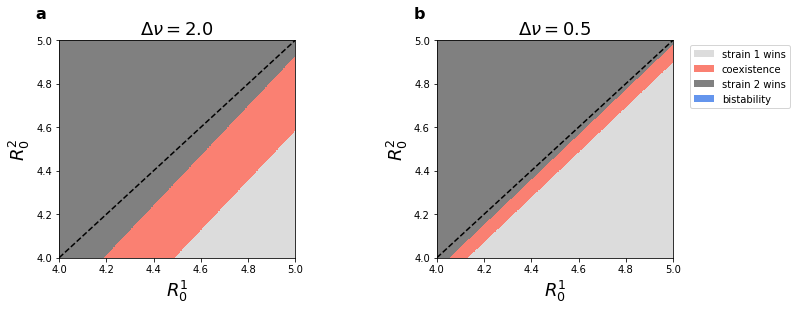

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (11,4))
fig.subplots_adjust(wspace = 0.6)
colors = ['gainsboro', 'salmon', 'grey', 'cornflowerblue']
label = np.array(['a', 'b'])

for i in range (0, 2):
    ax[i].contourf(x, y, scen[i], levels = [-1, 0, 1, 2, 3], colors = colors)
    ax[i].plot(X,X, 'k--', label = '$R^1_0 = R^2_0$')
    ax[i].set_ylabel('$R^2_0$', fontsize = 18)
    ax[i].set_xlabel('$R^1_0$', fontsize = 18)
    ax[i].text(-0.1, 1.1, '{}'.format(label[i]), transform=ax[i].transAxes, size=16, weight='bold')
    ax[i].set_title('$\\Delta \\nu = {}$'.format(del_nu[i]), fontsize = 18)
    
proxy = [plt.Rectangle((0,0),1,1, fc = pc.get_facecolor()[0]) for pc in ax[0].collections]
ax[1].legend(proxy, ["strain 1 wins", "coexistence", "strain 2 wins", "bistability"], bbox_to_anchor=(1.05, 1), loc='upper left')